In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [3]:
data = pd.read_csv('../data/preprocessed_data.csv')

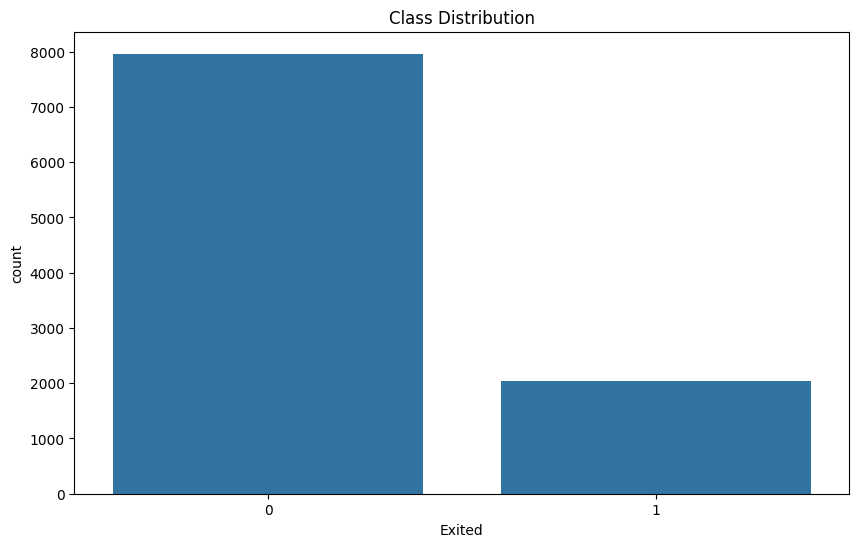

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Exited',data=data)
plt.title('Class Distribution')
plt.show()

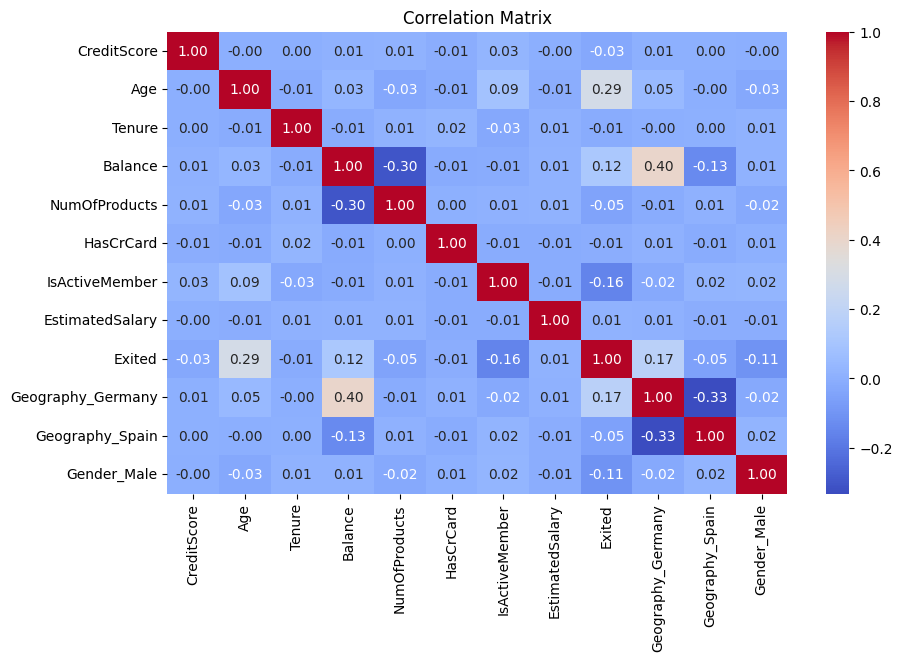

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
X = data.drop('Exited', axis=1)
y = data['Exited']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestClassifier(random_state=18)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=18)

In [15]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [16]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



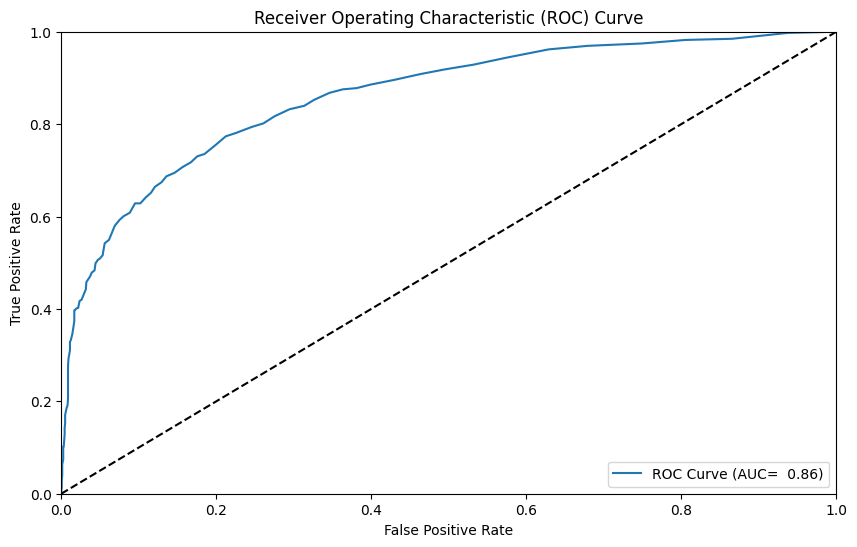

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC= {auc: .2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
print(f'AUC: {auc:.2f}')

AUC: 0.86


In [19]:
import joblib
joblib.dump(model, '../models/trained_model.pkl')

['../models/trained_model.pkl']